## اضافه‌کردن کتابخانه‌های مورد نیاز

In [1]:
import sklearn
from sklearn.datasets import load_breast_cancer
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

## خواندن داده
داده‌های سرطان سینه همراه با کتابخانه `sklearn` وجود داد.
و می‌توانیم به شکل زیر آنها را بخوانیم.

البته این تابع شکل خام داده‌را برمی‌گرداند.

In [2]:
data = load_breast_cancer()

In [3]:
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

حال داده را به شکل یک `DataFrame` در می‌اوریم و **خوش‌خیم** یا **بدخیم** بودن را نیز به آن نظیر می‌کنیم.

In [4]:
dataframe = pd.DataFrame(data.data,columns=data.feature_names)
dataframe['target'] = data.target
dataframe['target'] = dataframe['target'].apply(lambda x:data.target_names[x])

تابع زیر را طوری تعریف می‌کنیم تا از روی خوش‌خیم یا بدخیم بودن تومور رنگ متفاوتی برای آن ارائه دهد و سپس آن را روی ستون جواب داده اعمال می‌کنیم

In [5]:
def choose_color(label):
    return 'red' if label == 'malignant' else 'green'
colors = dataframe['target'].apply(choose_color)

حال نمودار `scatter` دو ویژگی از داده را رسم می‌کنیم تا ببینیم آیا بر اساس این دو ویژگی می‌توان آنها را از هم جداسازی کرد؟

همچنین برای واضح تر شدن نمودار برای آن `legend` .می‌سازیم

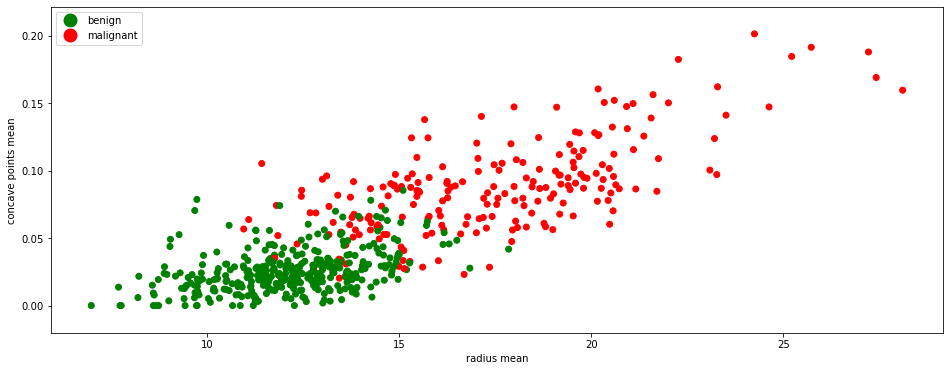

In [6]:
plt.figure(figsize=(16,6))
plt.scatter(dataframe['mean radius'] ,dataframe['mean concave points'],color=colors)
plt.xlabel('radius mean')
plt.ylabel('concave points mean')
legend_elements = [ Line2D([0], [0], marker='o', color='w', label='benign',
                          markerfacecolor='g', markersize=15),
                  Line2D([0], [0], marker='o', color='w', label='malignant',
                          markerfacecolor='r', markersize=15)]

plt.legend(handles=legend_elements,loc='upper left')